(7, 5) (1, 5) (2, 5)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - AUC: 0.1667 - accuracy: 0.1429 - loss: 0.8290 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.6988
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - AUC: 0.4167 - accuracy: 0.4286 - loss: 0.7363 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6774
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - AUC: 0.0000e+00 - accuracy: 0.1429 - loss: 0.8216 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6564
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - AUC: 0.0833 - accuracy: 0.1429 - loss: 1.0124 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6364
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - AUC: 0.0000e+00 - accuracy: 0.1429 - loss: 0.8989 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6163
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - AUC: 0.5833 - accuracy: 0.4286 - loss: 0.6669 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5967
Epoch 7/100
1

C:\Users\farha\OneDrive\Desktop\testing\.venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


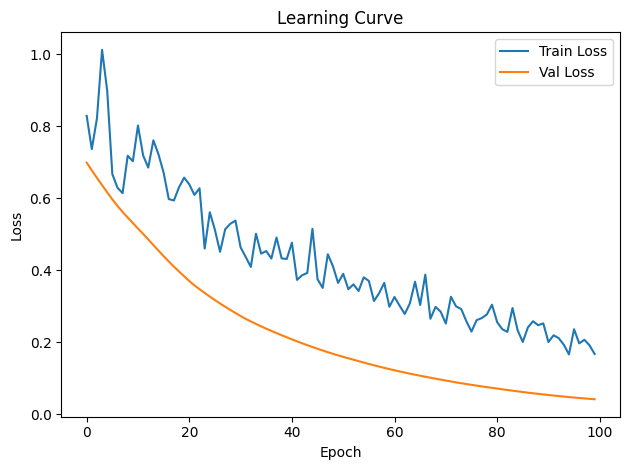

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === 1. Load dataset ===
df = pd.read_csv("processed_kelulusan.csv")
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

# === 2. Standarisasi ===
sc = StandardScaler()
Xs = sc.fit_transform(X)

# === 3. Split data ===
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42  # tanpa stratify
)
print(X_train.shape, X_val.shape, X_test.shape)

# === 4. Model Neural Network ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # klasifikasi biner
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", "AUC"]
)
model.summary()

# === 5. Early Stopping ===
es = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# === 6. Training ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)  # ← tanda kurung penutup sudah ditambahkan di sini

# === 7. Evaluasi ===
from sklearn.metrics import classification_report, confusion_matrix

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print("Test Acc:", acc, "AUC:", auc)

y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

# === 8. Visualisasi Learning Curve ===
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve")
plt.tight_layout()
plt.savefig("learning_curve.png", dpi=120)
plt.show()
